In [1]:
import pandas as pd 
import seaborn as sns 
import numpy as np

In [2]:
df = pd.read_csv('CIA-1 Dataset - Dataset (1).csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      500 non-null    int64  
 1   Product ID               500 non-null    object 
 2   Type                     500 non-null    object 
 3   Air temperature [K]      500 non-null    float64
 4   Process temperature [K]  500 non-null    float64
 5   Rotational speed [rpm]   500 non-null    int64  
 6   Torque [Nm]              500 non-null    float64
 7   Vibration Levels         500 non-null    float64
 8   Operational Hours        500 non-null    float64
 9   Failure Type             500 non-null    object 
dtypes: float64(5), int64(2), object(3)
memory usage: 39.2+ KB


In [5]:
df.describe()

,UDI,Air temperature [K],Process temperature [K],Rotational speed [rpm],Torque [Nm],Vibration Levels,Operational Hours
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,250.500000,298.097800,308.576400,1540.494000,39.882800,36.904811,81.106840
std,144.481833,0.563071,0.345372,193.658248,9.768592,9.242797,45.904853
min,1.000000,297.200000,307.900000,1208.000000,4.200000,23.000000,10.000000
25%,125.750000,297.500000,308.300000,1424.750000,33.575000,31.183871,36.202500
50%,250.500000,298.100000,308.500000,1498.000000,40.350000,35.000000,77.575000
75%,375.250000,298.625000,308.800000,1604.500000,46.225000,44.000000,121.097500
max,500.000000,299.100000,309.500000,2874.000000,65.700000,55.000000,165.330000


In [6]:
df.isnull().sum()

UDI                        0
Product ID                 0
Type                       0
Air temperature [K]        0
Process temperature [K]    0
Rotational speed [rpm]     0
Torque [Nm]                0
Vibration Levels           0
Operational Hours          0
Failure Type               0
dtype: int64

In [8]:
df.columns

Index(['UDI', 'Product ID', 'Type', 'Air temperature [K]',
       'Process temperature [K]', 'Rotational speed [rpm]', 'Torque [Nm]',
       'Vibration Levels ', 'Operational Hours', 'Failure Type'],
      dtype='object')

## Rotational Speed vs. Torque

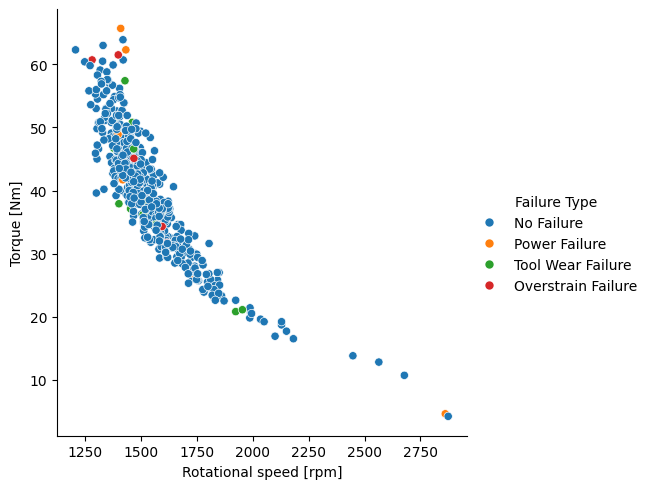

In [9]:
sns.relplot(x='Rotational speed [rpm]', y='Torque [Nm]', hue='Failure Type', data=df)

##### Shows how torque varies with rotational speed.
##### The hue='Failure Type' helps see if failures occur at specific speed-torque combinations.

## Air Temperature vs. Process Temperature

C:\Users\anujn\AppData\Local\Temp\ipykernel_4972\874086318.py:5: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')


NameError: name 'plt' is not defined

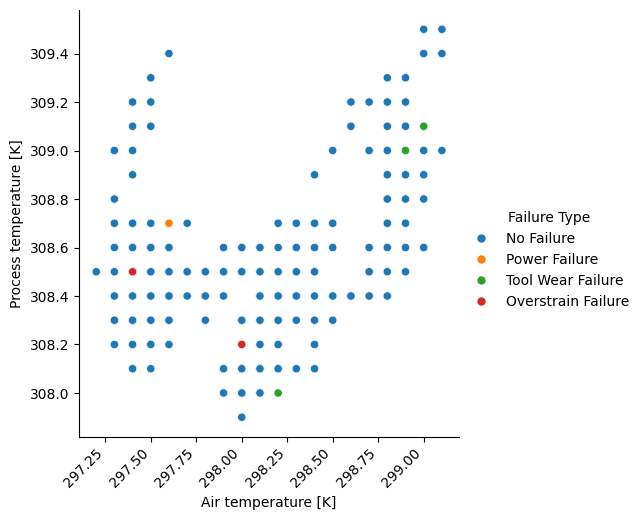

In [16]:
g = sns.relplot(x='Air temperature [K]', y='Process temperature [K]', hue='Failure Type', data=df)

# Rotate x-axis labels for the FacetGrid
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

plt.show()

##### Helps analyze if temperature differences affect failures.

## Vibration Levels vs. Operational Hours

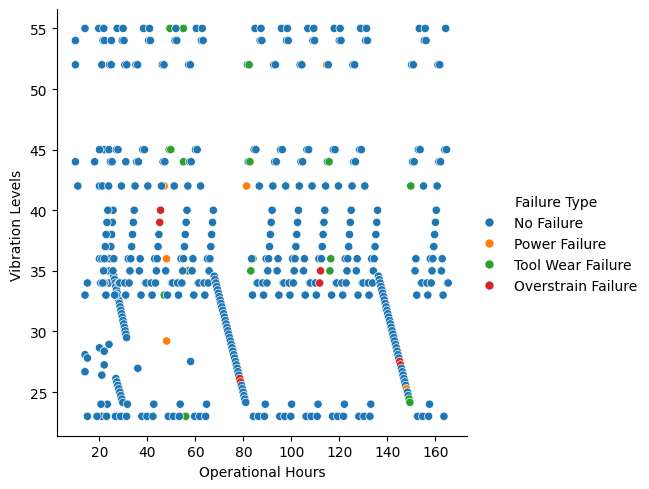

In [17]:
sns.relplot(x='Operational Hours', y='Vibration Levels ', hue='Failure Type', data=df)

##### Useful to check if vibration increases as machines age.

## Rotational Speed vs. Vibration Levels

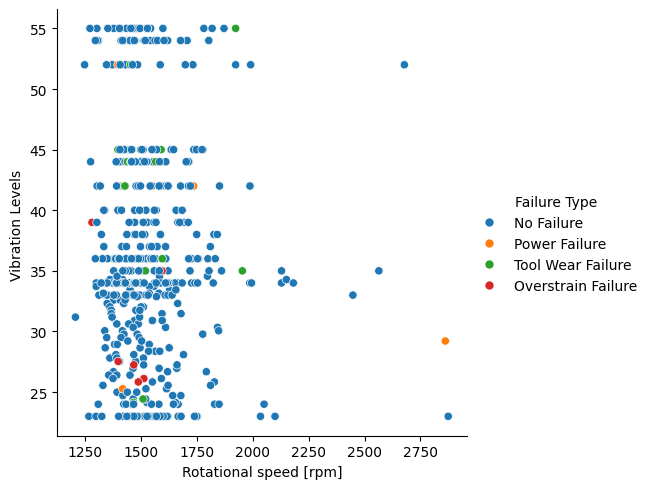

In [18]:
sns.relplot(x='Rotational speed [rpm]', y='Vibration Levels ', hue='Failure Type', data=df)

##### Helps detect if higher RPMs lead to excessive vibrations, which might cause failures.

In [21]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.Collecting xgboost
   ---------------------------------------- 0.0/124.9 MB ? eta -:--:--
   ---------------------------------------- 0.3/124.9 MB ? eta -:--:--
   ---------------------------------------- 1.3/124.9 MB 3.4 MB/s eta 0:00:36
    --------------------------------------- 2.1/124.9 MB 3.9 MB/s eta 0:00:32
   - -------------------------------------- 3.1/124.9 MB 4.1 MB/s eta 0:00:30
   - -------------------------------------- 3.7/124.9 MB 3.9 MB/s eta 0:00:32
   - -------------------------------------- 4.2/124.9 MB 3.6 MB/s eta 0:00:34
   - -------------------------------------- 5.0/124.9 MB 3.5 MB/s eta 0:00:35
   - -------------------------------------- 5.5/124.9 MB 3.4 MB/s eta 0:00:36
   - -------------------------------------- 6.0/124.9 MB 3.3 MB/s eta 0:00:36
   -- ------------------------------------- 6.6/124.9 MB 3.3 MB/s eta 0:00:37
   -- ------------------------------------- 7.6/124.9 MB 3.4 MB/s eta 0:


[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [22]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

## Droping unnecessary columns

In [25]:
df.drop(columns=['UDI', 'Product ID'], inplace=True, errors='ignore') 

## Encode categorical features (if 'Type' or 'Failure Type' are categorical)

In [27]:
le = LabelEncoder()
df['Type'] = le.fit_transform(df['Type'])
df['Failure Type'] = le.fit_transform(df['Failure Type'])  # Target variable

## Define features and target variable

In [28]:
X = df.drop(columns=['Failure Type'])  # Features
y = df['Failure Type']  # Target

## Spliting the dataset into training and testing sets (80% train, 20% test)

In [30]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scale numerical features

In [31]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

## Train a Random Forest model

In [32]:
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

## Predict on test data

In [33]:
y_pred_rf = rf_model.predict(X_test)

## Evaluate the model

In [34]:
print("Random Forest Model Performance:")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))
print(classification_report(y_test, y_pred_rf))

Random Forest Model Performance:
Accuracy: 0.86
              precision    recall  f1-score   support

           0       0.86      1.00      0.92        86
           2       0.00      0.00      0.00         4
           3       0.00      0.00      0.00        10

    accuracy                           0.86       100
   macro avg       0.29      0.33      0.31       100
weighted avg       0.74      0.86      0.80       100



C:\Users\anujn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anujn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\anujn\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Feature Importance Plot

In [36]:
feature_importances = rf_model.feature_importances_
feature_names = X.columns

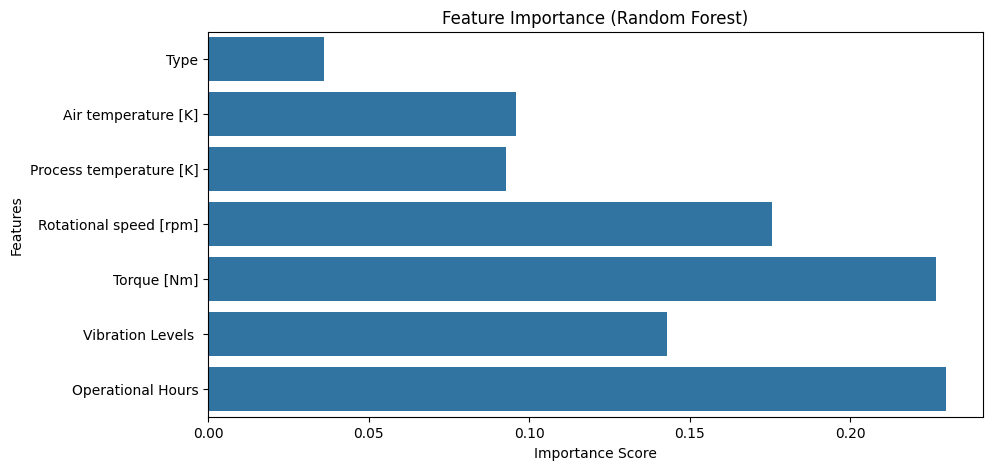

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns  # Ensure Seaborn is also imported

plt.figure(figsize=(10, 5))
sns.barplot(x=feature_importances, y=feature_names)
plt.title("Feature Importance (Random Forest)")
plt.xlabel("Importance Score")
plt.ylabel("Features")
plt.show()